In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
from astropy import time as t

from poliastro.bodies import Earth
from poliastro.twobody import Orbit
import poliastro

import urllib.request
import json
from collections import OrderedDict

import emcee

# Loading a single File 

In [2]:
# read file
with open('testing_data/00_jena_iss_test.json', 'r') as myfile:
    data=myfile.read()

In [3]:
obj = json.loads(data)

In [4]:
obj

{'__comment': None,
 'meta_data': {'file_name': '00_jena_iss_test.json',
  'gs_count': 1,
  'sat_count': 1},
 'ground_station': {'gs_id': 'JENA',
  'lat': 50.9271,
  'lon': 11.5892,
  'alt': 143,
  'monitored': 'ISS'},
 'satellites': [{'sat_id': 25544,
   'f_c': 630000000.0,
   'data_stream': [{'time_unix': '1562810340.000',
     'time_gnss': None,
     'f_m': '629991146.55',
     'gs_distance': '2317.41'},
    {'time_unix': '1562810350.000',
     'time_gnss': None,
     'f_m': '629991438.73',
     'gs_distance': '2275.97'},
    {'time_unix': '1562810360.000',
     'time_gnss': None,
     'f_m': '629991748.03',
     'gs_distance': '2235.96'},
    {'time_unix': '1562810370.000',
     'time_gnss': None,
     'f_m': '629992075.01',
     'gs_distance': '2197.46'},
    {'time_unix': '1562810380.000',
     'time_gnss': None,
     'f_m': '629992420.17',
     'gs_distance': '2160.56'},
    {'time_unix': '1562810390.000',
     'time_gnss': None,
     'f_m': '629992783.93',
     'gs_distance': '

In [5]:
print(obj.keys())

dict_keys(['__comment', 'meta_data', 'ground_station', 'satellites'])


In [6]:
obj['ground_station']

{'gs_id': 'JENA',
 'lat': 50.9271,
 'lon': 11.5892,
 'alt': 143,
 'monitored': 'ISS'}

In [7]:
GS = obj['ground_station']

In [8]:
obj['meta_data']

{'file_name': '00_jena_iss_test.json', 'gs_count': 1, 'sat_count': 1}

In [9]:
obj['satellites']

[{'sat_id': 25544,
  'f_c': 630000000.0,
  'data_stream': [{'time_unix': '1562810340.000',
    'time_gnss': None,
    'f_m': '629991146.55',
    'gs_distance': '2317.41'},
   {'time_unix': '1562810350.000',
    'time_gnss': None,
    'f_m': '629991438.73',
    'gs_distance': '2275.97'},
   {'time_unix': '1562810360.000',
    'time_gnss': None,
    'f_m': '629991748.03',
    'gs_distance': '2235.96'},
   {'time_unix': '1562810370.000',
    'time_gnss': None,
    'f_m': '629992075.01',
    'gs_distance': '2197.46'},
   {'time_unix': '1562810380.000',
    'time_gnss': None,
    'f_m': '629992420.17',
    'gs_distance': '2160.56'},
   {'time_unix': '1562810390.000',
    'time_gnss': None,
    'f_m': '629992783.93',
    'gs_distance': '2125.35'},
   {'time_unix': '1562810400.000',
    'time_gnss': None,
    'f_m': '629993166.57',
    'gs_distance': '2091.91'},
   {'time_unix': '1562810410.000',
    'time_gnss': None,
    'f_m': '629993568.25',
    'gs_distance': '2060.34'},
   {'time_unix':

In [10]:
obj['satellites'][0]['sat_id']

25544

In [11]:
obj['satellites'][0].keys()

dict_keys(['sat_id', 'f_c', 'data_stream'])

In [12]:
obj['satellites'][0]['f_c']

630000000.0

In [13]:
obj['satellites'][0]['data_stream']

[{'time_unix': '1562810340.000',
  'time_gnss': None,
  'f_m': '629991146.55',
  'gs_distance': '2317.41'},
 {'time_unix': '1562810350.000',
  'time_gnss': None,
  'f_m': '629991438.73',
  'gs_distance': '2275.97'},
 {'time_unix': '1562810360.000',
  'time_gnss': None,
  'f_m': '629991748.03',
  'gs_distance': '2235.96'},
 {'time_unix': '1562810370.000',
  'time_gnss': None,
  'f_m': '629992075.01',
  'gs_distance': '2197.46'},
 {'time_unix': '1562810380.000',
  'time_gnss': None,
  'f_m': '629992420.17',
  'gs_distance': '2160.56'},
 {'time_unix': '1562810390.000',
  'time_gnss': None,
  'f_m': '629992783.93',
  'gs_distance': '2125.35'},
 {'time_unix': '1562810400.000',
  'time_gnss': None,
  'f_m': '629993166.57',
  'gs_distance': '2091.91'},
 {'time_unix': '1562810410.000',
  'time_gnss': None,
  'f_m': '629993568.25',
  'gs_distance': '2060.34'},
 {'time_unix': '1562810420.000',
  'time_gnss': None,
  'f_m': '629993988.94',
  'gs_distance': '2030.73'},
 {'time_unix': '1562810430.0

In [14]:
data = obj['satellites'][0]['data_stream']

In [15]:
for dat in data:
    print(dat['time_unix'], dat['f_m'])

1562810340.000 629991146.55
1562810350.000 629991438.73
1562810360.000 629991748.03
1562810370.000 629992075.01
1562810380.000 629992420.17
1562810390.000 629992783.93
1562810400.000 629993166.57
1562810410.000 629993568.25
1562810420.000 629993988.94
1562810430.000 629994428.45
1562810440.000 629994886.37
1562810450.000 629995362.05
1562810460.000 629995854.60
1562810470.000 629996362.88
1562810480.000 629996885.48
1562810490.000 629997420.76
1562810500.000 629997966.82
1562810510.000 629998521.57
1562810520.000 629999082.72
1562810530.000 629999647.86
1562810540.000 630000214.50
1562810550.000 630000780.11
1562810560.000 630001342.17
1562810570.000 630001898.25
1562810580.000 630002446.04
1562810590.000 630002983.41
1562810600.000 630003508.42
1562810610.000 630004019.36
1562810620.000 630004514.79
1562810630.000 630004993.51
1562810640.000 630005454.58
1562810650.000 630005897.31
1562810660.000 630006321.24
1562810670.000 630006726.13
1562810680.000 630007111.94
1562810690.000 63000

In [16]:
timelist = []

for dat in data:
    T = dat['time_unix']
    T = float(T)
    timelist.append( t.Time(T, format="unix", scale="utc"))

In [17]:
timelist

[<Time object: scale='utc' format='unix' value=1562810340.0>,
 <Time object: scale='utc' format='unix' value=1562810350.0000002>,
 <Time object: scale='utc' format='unix' value=1562810360.0>,
 <Time object: scale='utc' format='unix' value=1562810370.0000002>,
 <Time object: scale='utc' format='unix' value=1562810380.0>,
 <Time object: scale='utc' format='unix' value=1562810390.0000002>,
 <Time object: scale='utc' format='unix' value=1562810400.0>,
 <Time object: scale='utc' format='unix' value=1562810410.0>,
 <Time object: scale='utc' format='unix' value=1562810420.0>,
 <Time object: scale='utc' format='unix' value=1562810430.0>,
 <Time object: scale='utc' format='unix' value=1562810440.0000002>,
 <Time object: scale='utc' format='unix' value=1562810450.0>,
 <Time object: scale='utc' format='unix' value=1562810460.0000002>,
 <Time object: scale='utc' format='unix' value=1562810470.0>,
 <Time object: scale='utc' format='unix' value=1562810480.0000002>,
 <Time object: scale='utc' format=

In [18]:
GS

{'gs_id': 'JENA',
 'lat': 50.9271,
 'lon': 11.5892,
 'alt': 143,
 'monitored': 'ISS'}

In [19]:
gs = coord.EarthLocation( GS["lon"], GS["lat"], GS["alt"]) 

In [20]:
gs

<EarthLocation (3946293.3013581, 809282.50717543, 4928547.87338264) m>

In [21]:
gs.to_geodetic()

GeodeticLocation(lon=<Longitude 11.5892 deg>, lat=<Latitude 50.9271 deg>, height=<Quantity 143. m>)

In [22]:
GS_loc = []

for tau in timelist:
    GS_loc.append( gs.get_gcrs_posvel(obstime = tau ) )
    

### Now we have the Ground Station location in XYZ in the Geocentric Inertial System.

Regading, this is the System where Satellite coordinates are measured.

In [23]:
GS_loc

[(<CartesianRepresentation (x, y, z) in m
      (3490465.92481309, -2027129.61147224, 4922006.3289872)>,
  <CartesianRepresentation (x, y, z) in m / s
      (147.81360806, 253.85855918, -0.27098031)>),
 (<CartesianRepresentation (x, y, z) in m
      (3491943.13465408, -2024590.48676804, 4922003.62070328)>,
  <CartesianRepresentation (x, y, z) in m / s
      (147.62831285, 253.96633589, -0.27066427)>),
 (<CartesianRepresentation (x, y, z) in m
      (3493418.49247404, -2022050.28547153, 4922000.91592309)>,
  <CartesianRepresentation (x, y, z) in m / s
      (147.44329233, 254.07394477, -0.27031771)>),
 (<CartesianRepresentation (x, y, z) in m
      (3494891.99757907, -2019509.00898642, 4921998.21460857)>,
  <CartesianRepresentation (x, y, z) in m / s
      (147.25782938, 254.18137056, -0.26993299)>),
 (<CartesianRepresentation (x, y, z) in m
      (3496363.64914558, -2016966.65871642, 4921995.51677508)>,
  <CartesianRepresentation (x, y, z) in m / s
      (147.0725648, 254.28870481, -0.

### Now, calculate Doppler Shift 'z' from F_measured and F_c

#### Doppler Measurement and Compensation in Mobile Satellite Communications Systems

Quingchou Liu


$f_m = f_c \left( 1 + \frac{v(t)}{c} \cos \left(\alpha(t)\right) \right)$


With $\alpha$ as the angle between the satellite's velocity and the direction of propagation.

$ \frac{f_m}{f_c}  = 1 + \frac{v_{r}(t)}{c}$

$ v_{r}(t) = c \left( \frac{f_m}{f_c} - 1 \right)$

$ v_{r}(t) = c \frac{f_m - f_c}{f_c}  = \frac{c \Delta f}{f_c}$

$z = \frac{v}{c} = \frac{\Delta F}{f_c}$

In [24]:
c = 299792.458  # km/s

def get_redshift(f_c, f_m):
    z = (f_m - f_c)/f_c
    return z
    
def get_v_radial(f_c, f_m):
    v_r = c * get_redshift(f_c, f_m)
    return v_r

In [25]:
obj

{'__comment': None,
 'meta_data': {'file_name': '00_jena_iss_test.json',
  'gs_count': 1,
  'sat_count': 1},
 'ground_station': {'gs_id': 'JENA',
  'lat': 50.9271,
  'lon': 11.5892,
  'alt': 143,
  'monitored': 'ISS'},
 'satellites': [{'sat_id': 25544,
   'f_c': 630000000.0,
   'data_stream': [{'time_unix': '1562810340.000',
     'time_gnss': None,
     'f_m': '629991146.55',
     'gs_distance': '2317.41'},
    {'time_unix': '1562810350.000',
     'time_gnss': None,
     'f_m': '629991438.73',
     'gs_distance': '2275.97'},
    {'time_unix': '1562810360.000',
     'time_gnss': None,
     'f_m': '629991748.03',
     'gs_distance': '2235.96'},
    {'time_unix': '1562810370.000',
     'time_gnss': None,
     'f_m': '629992075.01',
     'gs_distance': '2197.46'},
    {'time_unix': '1562810380.000',
     'time_gnss': None,
     'f_m': '629992420.17',
     'gs_distance': '2160.56'},
    {'time_unix': '1562810390.000',
     'time_gnss': None,
     'f_m': '629992783.93',
     'gs_distance': '

In [26]:
f_c = obj['satellites'][0]['f_c']

In [27]:
f_c

630000000.0

In [28]:
f_m = []
for dat in data:
    f_m.append(float(dat['f_m']))
    print(f_m[-1])

629991146.55
629991438.73
629991748.03
629992075.01
629992420.17
629992783.93
629993166.57
629993568.25
629993988.94
629994428.45
629994886.37
629995362.05
629995854.6
629996362.88
629996885.48
629997420.76
629997966.82
629998521.57
629999082.72
629999647.86
630000214.5
630000780.11
630001342.17
630001898.25
630002446.04
630002983.41
630003508.42
630004019.36
630004514.79
630004993.51
630005454.58
630005897.31
630006321.24
630006726.13
630007111.94
630007478.78
630007826.92
630008156.74
630008468.74
630008763.46
630009041.54
630009303.63
630009550.41
630009782.59
630010000.87
630010205.94
630010398.49
630010579.18
630010748.67
630010907.58
630011056.49
630011195.98
630011326.58
630011448.81


In [29]:
f_c

630000000.0

In [30]:
print(get_redshift(f_c,630011448.81))

1.817271428562346e-05


In [32]:
z = []
for f in f_m:
    print(get_redshift(f_c, f))
    z.append(get_redshift(f_c, f))

-1.4053095238170927e-05
-1.3589317460287186e-05
-1.3098365079410493e-05
-1.2579349206364344e-05
-1.203147619054431e-05
-1.1454079365162622e-05
-1.0846714285631028e-05
-1.0209126984126984e-05
-9.541365079274253e-06
-8.84373015865447e-06
-8.116873015865447e-06
-7.361825396901085e-06
-6.579999999962156e-06
-5.773206349213918e-06
-4.9436825396522646e-06
-4.094031746046884e-06
-3.227269841186584e-06
-2.3467142856310285e-06
-1.4559999999545869e-06
-5.589523809296744e-07
3.4047619047619047e-07
1.2382698412925479e-06
2.130428571360452e-06
3.013095238095238e-06
3.8826031745426235e-06
4.735571428518447e-06
5.568920634852515e-06
6.379936507959214e-06
7.166333333272783e-06
7.926206349191211e-06
8.658063492131612e-06
9.360809523718697e-06
1.0033714285729423e-05
1.0676396825389257e-05
1.1288793650884478e-05
1.1871079365033953e-05
1.242368253961442e-05
1.2947206349221488e-05
1.3442444444459582e-05
1.3910253968314519e-05
1.4351650793590242e-05
1.4767666666659098e-05
1.515938095232797e-05
1.55279206349

In [33]:
z

[-1.4053095238170927e-05,
 -1.3589317460287186e-05,
 -1.3098365079410493e-05,
 -1.2579349206364344e-05,
 -1.203147619054431e-05,
 -1.1454079365162622e-05,
 -1.0846714285631028e-05,
 -1.0209126984126984e-05,
 -9.541365079274253e-06,
 -8.84373015865447e-06,
 -8.116873015865447e-06,
 -7.361825396901085e-06,
 -6.579999999962156e-06,
 -5.773206349213918e-06,
 -4.9436825396522646e-06,
 -4.094031746046884e-06,
 -3.227269841186584e-06,
 -2.3467142856310285e-06,
 -1.4559999999545869e-06,
 -5.589523809296744e-07,
 3.4047619047619047e-07,
 1.2382698412925479e-06,
 2.130428571360452e-06,
 3.013095238095238e-06,
 3.8826031745426235e-06,
 4.735571428518447e-06,
 5.568920634852515e-06,
 6.379936507959214e-06,
 7.166333333272783e-06,
 7.926206349191211e-06,
 8.658063492131612e-06,
 9.360809523718697e-06,
 1.0033714285729423e-05,
 1.0676396825389257e-05,
 1.1288793650884478e-05,
 1.1871079365033953e-05,
 1.242368253961442e-05,
 1.2947206349221488e-05,
 1.3442444444459582e-05,
 1.3910253968314519e-05,
 

In [38]:


for tau in timelist:
    print(tau.plot_date)

737251.0826388889
737251.0827546297
737251.0828703704
737251.082986111
737251.0831018519
737251.0832175926
737251.0833333334
737251.0834490741
737251.0835648148
737251.0836805556
737251.0837962963
737251.0839120371
737251.0840277778
737251.0841435185
737251.0842592593
737251.084375
737251.0844907408
737251.0846064815
737251.0847222222
737251.084837963
737251.0849537037
737251.0850694445
737251.0851851852
737251.0853009259
737251.0854166667
737251.0855324074
737251.0856481482
737251.0857638889
737251.0858796296
737251.0859953704
737251.0861111111
737251.0862268518
737251.0863425926
737251.0864583333
737251.0865740741
737251.0866898148
737251.0868055555
737251.0869212963
737251.087037037
737251.0871527778
737251.0872685185
737251.0873842592
737251.0875
737251.0876157407
737251.0877314815
737251.0878472222
737251.0879629629
737251.0880787037
737251.0881944444
737251.0883101852
737251.0884259259
737251.0885416666
737251.0886574074
737251.0887731481


In [39]:
timelist[0]

<Time object: scale='utc' format='unix' value=1562810340.0>

In [40]:
timelist[0].plot_date

737251.0826388889

1562810340.0 -1.4053095238170927e-05
1562810350.0000002 -1.3589317460287186e-05
1562810360.0 -1.3098365079410493e-05
1562810370.0000002 -1.2579349206364344e-05
1562810380.0 -1.203147619054431e-05
1562810390.0000002 -1.1454079365162622e-05
1562810400.0 -1.0846714285631028e-05
1562810410.0 -1.0209126984126984e-05
1562810420.0 -9.541365079274253e-06
1562810430.0 -8.84373015865447e-06
1562810440.0000002 -8.116873015865447e-06
1562810450.0 -7.361825396901085e-06
1562810460.0000002 -6.579999999962156e-06
1562810470.0 -5.773206349213918e-06
1562810480.0000002 -4.9436825396522646e-06
1562810490.0 -4.094031746046884e-06
1562810500.0 -3.227269841186584e-06
1562810510.0000002 -2.3467142856310285e-06
1562810520.0 -1.4559999999545869e-06
1562810530.0000002 -5.589523809296744e-07
1562810540.0 3.4047619047619047e-07
1562810550.0000002 1.2382698412925479e-06
1562810560.0 2.130428571360452e-06
1562810570.0 3.013095238095238e-06
1562810580.0 3.8826031745426235e-06
1562810590.0 4.735571428518447e-06
1562

(-2e-05, 2e-05)

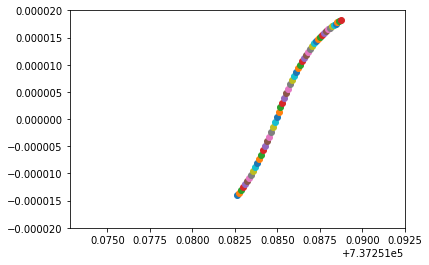

In [47]:
for tau, z_m in zip(timelist, z):
    print(tau, z_m)
    plt.scatter(tau.plot_date, z_m)
    
plt.ylim(-2e-05, 2e-05)